#### Import Required Libraries ####

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
from os import system
import numpy as np
import matplotlib.animation as animation
import matplotlib

#### Animated Graph of Histogram of Predicted Probabilities ####

In [2]:
### Provide the parameters for the distribution ###

mu_one, sigma_one = 0.8, 0.03
mu_zero, sigma_zero = 0.5, 0.05

<IPython.core.display.Javascript object>


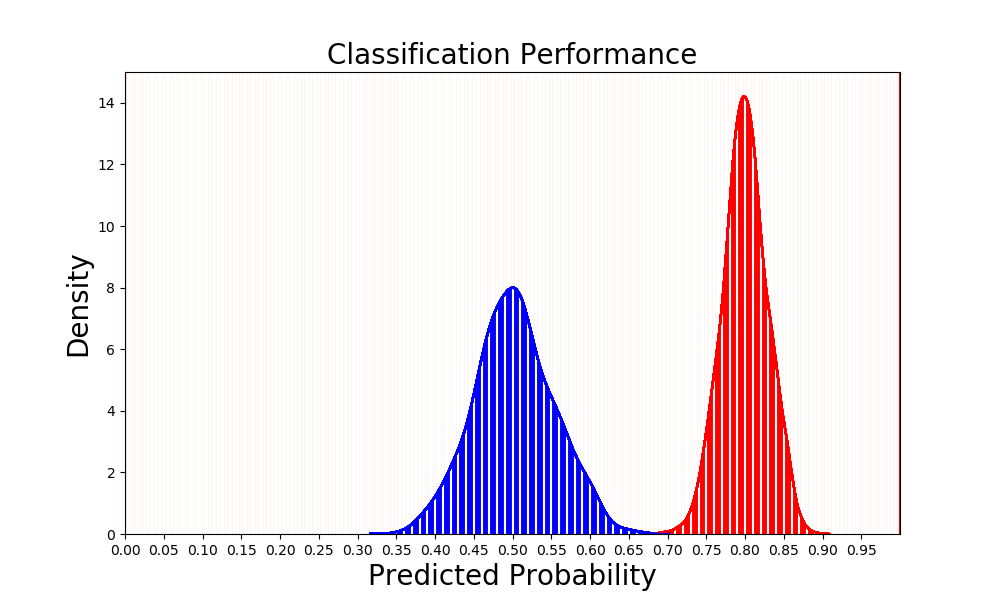

In [3]:
### Animate and Plot ###

%matplotlib notebook

fig = plt.figure(figsize=(10,6))
plt.xlim(0, 1)
plt.ylim(0, 15)
plt.xticks(np.arange(0, 1, 0.05))
plt.xlabel('Predicted Probability',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.title('Classification Performance',fontsize=20)


pred_prob_one = np.random.normal(mu_one, sigma_one, 1000)
pred_prob_zero = np.random.normal(mu_zero, sigma_zero, 1000)

df = pd.DataFrame(np.zeros(101*6).reshape(101,6))
df.columns = ['Threshold', 'TPR', 'TNR', 'FPR', 'FNR','Misclass']    

def animate(i):
    threshold = 0.01*i
    sns.kdeplot(pred_prob_one, shade=True, color = "r")
    sns.kdeplot(pred_prob_zero, shade=True, color = "b")
    plt.axvline(threshold, 0,20, color = 'red')
    plt.axvline(threshold - 0.01, 0,20, color = 'white')
    fig.canvas.draw_idle()
    true_pos = len(pred_prob_one[pred_prob_one>=threshold])
    true_neg = len(pred_prob_zero[pred_prob_zero<=threshold])
    false_pos = len(pred_prob_zero[pred_prob_zero>=threshold])
    false_neg = len(pred_prob_one[pred_prob_one<=threshold])
    df.iloc[i,0] = threshold
    df.iloc[i,1] = true_pos/len(pred_prob_one)
    df.iloc[i,2] = true_neg/len(pred_prob_zero)
    df.iloc[i,3] = false_pos/len(pred_prob_zero)
    df.iloc[i,4] = false_neg/len(pred_prob_one)
    df.iloc[i,5] = (false_pos + false_neg)/(len(pred_prob_one) + len(pred_prob_zero))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=101, repeat=False)
plt.show()

#### Animated Graph of ROC ####

Traceback (most recent call last):
  File "C:\Users\anurag.halder\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\anurag.halder\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


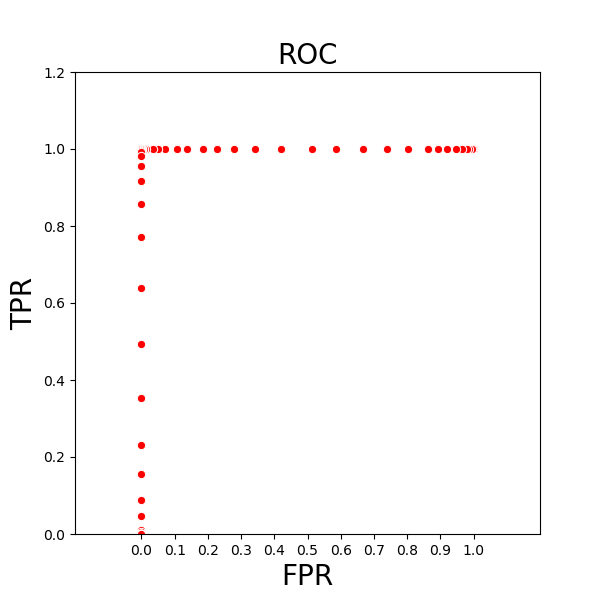

In [4]:
%matplotlib notebook

fig = plt.figure(figsize=(6,6))
plt.xlim(-0.2, 1.2)
plt.ylim(0, 1.2)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('FPR',fontsize=20)
plt.ylabel('TPR',fontsize=20)
plt.title('ROC',fontsize=20)

df = pd.DataFrame(np.zeros(101*6).reshape(101,6))
df.columns = ['Threshold', 'TPR', 'TNR', 'FPR', 'FNR','Misclass']    

def animate(i):
    threshold = 0.01*i
    true_pos = len(pred_prob_one[pred_prob_one>=threshold])
    true_neg = len(pred_prob_zero[pred_prob_zero<=threshold])
    false_pos = len(pred_prob_zero[pred_prob_zero>=threshold])
    false_neg = len(pred_prob_one[pred_prob_one<=threshold])
    df.iloc[i,0] = threshold
    df.iloc[i,1] = true_pos/len(pred_prob_one)
    df.iloc[i,2] = true_neg/len(pred_prob_zero)
    df.iloc[i,3] = false_pos/len(pred_prob_zero)
    df.iloc[i,4] = false_neg/len(pred_prob_one)
    df.iloc[i,5] = (false_pos + false_neg)/(len(pred_prob_one) + len(pred_prob_zero))
    subset_range = df.iloc[:int(i+1)]
    p = sns.scatterplot(x=subset_range['FPR'], y=subset_range['TPR'], data = df, color="r")
    #l = sns.lineplot(x=subset_range['FPR'], y=subset_range['TPR'], data = df, color="b")
    plt.setp(p.lines,linewidth=1)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=101, repeat=False)
plt.show()

#### Finding the Area Under The Curve (AUC) ####

In [5]:
df['dFPR'] = -df.diff(axis = 0, periods = 1)['FPR']
df['dTPR'] = -df.diff(axis = 0, periods = 1)['TPR']
df = df.fillna(0)
df['TPR_dFPR'] = df['TPR'] * df['dFPR']
df['dTPR_dFPR'] = (df['dTPR'] * df['dFPR'])/2
sum(df['dTPR_dFPR']) + sum(df['TPR_dFPR'])
f"The AUC for the simulation is: {sum(df['dTPR_dFPR']) + sum(df['TPR_dFPR'])}"

'The AUC for the simulation is: 1.0000000000000002'

#### Animated Graph of Misclassification Rate ####

Traceback (most recent call last):
  File "C:\Users\anurag.halder\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\anurag.halder\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


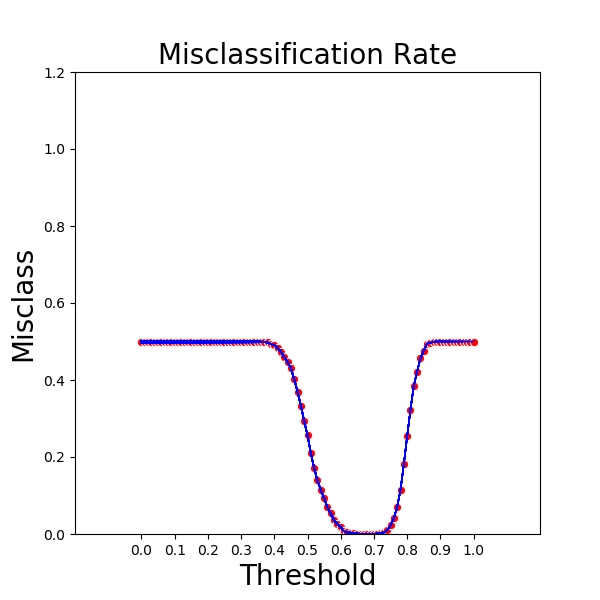

In [6]:
%matplotlib notebook

fig = plt.figure(figsize=(6,6))
plt.xlim(-0.2, 1.2)
plt.ylim(0, 1.2)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('FPR',fontsize=20)
plt.ylabel('TPR',fontsize=20)
plt.title('Misclassification Rate',fontsize=20)

df = pd.DataFrame(np.zeros(101*6).reshape(101,6))
df.columns = ['Threshold', 'TPR', 'TNR', 'FPR', 'FNR','Misclass']    

def animate(i):
    threshold = 0.01*i
    true_pos = len(pred_prob_one[pred_prob_one>=threshold])
    true_neg = len(pred_prob_zero[pred_prob_zero<=threshold])
    false_pos = len(pred_prob_zero[pred_prob_zero>=threshold])
    false_neg = len(pred_prob_one[pred_prob_one<=threshold])
    df.iloc[i,0] = threshold
    df.iloc[i,1] = true_pos/len(pred_prob_one)
    df.iloc[i,2] = true_neg/len(pred_prob_zero)
    df.iloc[i,3] = false_pos/len(pred_prob_zero)
    df.iloc[i,4] = false_neg/len(pred_prob_one)
    df.iloc[i,5] = (false_pos + false_neg)/(len(pred_prob_one) + len(pred_prob_zero))
    subset_range = df.iloc[:int(i+1)]
    p = sns.scatterplot(x=subset_range['Threshold'], y=subset_range['Misclass'], data = df, color="r")
    l = sns.lineplot(x=subset_range['Threshold'], y=subset_range['Misclass'], data = df, color="b")
    plt.setp(p.lines,linewidth=1)
    val = min(df['Misclass'])
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=101, repeat=False)
plt.show()

#### Arriving at the Threshold ####

In [7]:
df[df['Misclass']==min(df['Misclass'])]

,Threshold,TPR,TNR,FPR,FNR,Misclass
67,0.67,1.0,1.0,0.0,0.0,0.0
68,0.68,1.0,1.0,0.0,0.0,0.0
69,0.69,1.0,1.0,0.0,0.0,0.0
